# SGDR

## Importing the libraries

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers,models
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input  # Import Input function
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report



## Splitting the dataset into the Training set and Test set

In [40]:
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()

## Normalize pixel values to range [0, 1]


In [42]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train.shape

(50000, 32, 32, 3)

## Define a shallow network


In [44]:

# Define the model
model = models.Sequential([
    Input(shape=(32, 32, 3)),               # Input layer specifying input shape 3072+10/2 =1024
    layers.Flatten(),                      # Flatten the input image
    layers.Dense(512, activation='relu'),  # Single hidden layer with 512 neurons
    layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

## Compile the model with SGDR optimizer


In [46]:

lr_schedule=tf.keras.optimizers.schedules.CosineDecayRestarts(
    0.001,
    1000,
    name='SGDRDecay'
)
# Use an optimizer like SGD or Adam with the learning rate schedule
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# Compile the model with the optimizer, loss, and metrics
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


##  Train the model


In [48]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1798 - loss: 2.2524 - val_accuracy: 0.2689 - val_loss: 2.0755
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2721 - loss: 2.0654 - val_accuracy: 0.2909 - val_loss: 2.0164
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3009 - loss: 1.9907 - val_accuracy: 0.3213 - val_loss: 1.9586
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3307 - loss: 1.9419 - val_accuracy: 0.3253 - val_loss: 1.9388
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3365 - loss: 1.9265 - val_accuracy: 0.3333 - val_loss: 1.9287
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3425 - loss: 1.9117 - val_accuracy: 0.3391 - val_loss: 1.8978
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3520 - loss: 1.8719 - val_accuracy: 0.3439 - val_loss: 1.8731
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3606 - loss: 1.8516 - val_accuracy: 0.

## Making the classification Report

In [50]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

print("classification Report:  \n",classification_report(y_test,y_pred_classes))
print("SGDR Accuracy:  \n",accuracy_score(y_test,y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
classification Report:  
               precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.44      0.43      0.44      1000
           2       0.28      0.26      0.27      1000
           3       0.32      0.22      0.26      1000
           4       0.38      0.29      0.33      1000
           5       0.33      0.35      0.34      1000
           6       0.39      0.52      0.44      1000
           7       0.46      0.36      0.41      1000
           8       0.46      0.52      0.49      1000
           9       0.44      0.50      0.47      1000

    accuracy                           0.39     10000
   macro avg       0.39      0.39      0.39     10000
weighted avg       0.39      0.39      0.39     10000



## Visualize Training History (Accuracy and Loss)


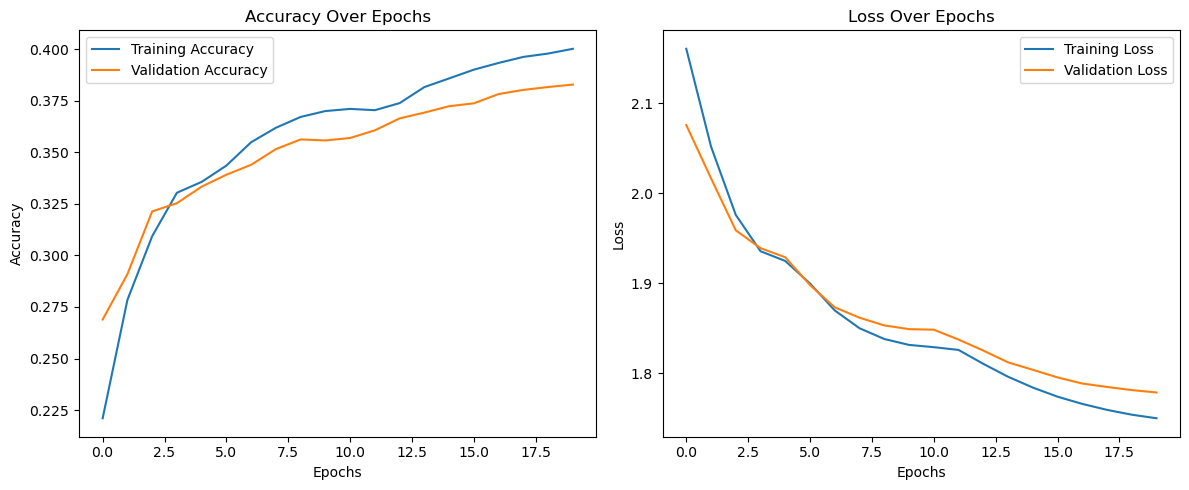

In [52]:

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Confusion Matrix Visualization

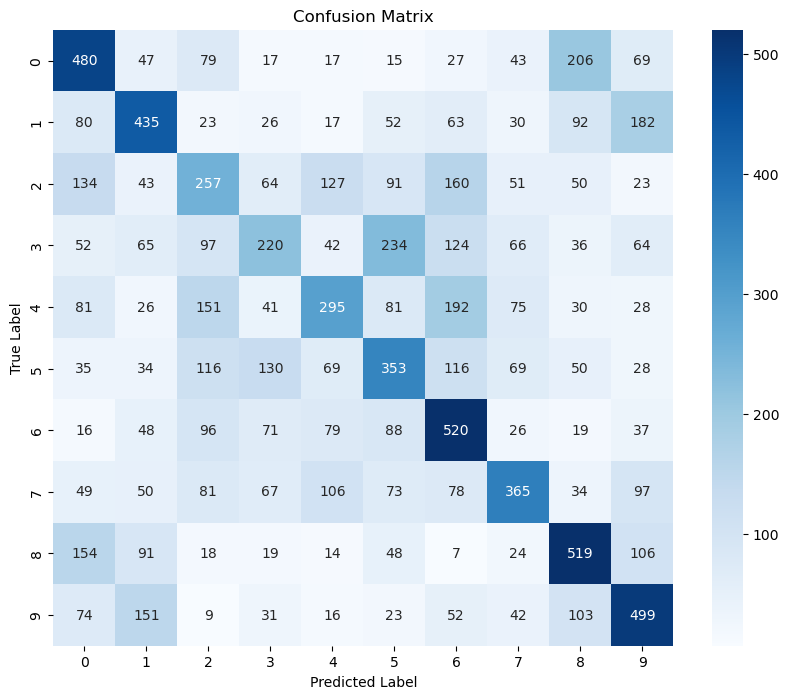

In [55]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

